In [16]:
%matplotlib inline
import torch
import imageio.v3 as iio
import os
import glob
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from PIL import Image

from torchvision.utils import make_grid
plt.rcParams.update({'font.size': 22})

In [7]:
path = '../_exp/samples'

In [9]:
ori = []
gen = []

folder = 'identity'

for p in sorted(glob.glob(f'{path}/{folder}/n01440764/*.png')):
    ori.append(torch.from_numpy(iio.imread(p)))

ori = torch.stack(ori)

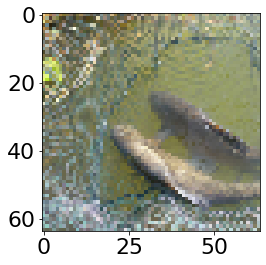

In [12]:
plt.imshow(ori[0, ::4, ::4])

In [10]:
ori.size()

torch.Size([19, 256, 256, 3])

In [13]:
ori = []
gen = []

folder = 'ddrmpp_awd/sr4/1.0_20_500'

for p in sorted(glob.glob(f'{path}/{folder}/n01440764/*_deg.png')):
    ori.append(torch.from_numpy(iio.imread(p)))
    
for p in sorted(glob.glob(f'{path}/{folder}/n01440764/*.png')):
    if 'deg' in p or 'ori' in p:
        continue
    gen.append(torch.from_numpy(iio.imread(p)))

ori = torch.stack(ori)
gen = torch.stack(gen)

In [14]:
np.savez('../../guided-diffusion/64_samples.npz', ori[:, ::4, ::4], np.zeros([ori.size(0)]).astype(int))

In [17]:
a = np.load('/tmp/openai-2022-07-12-16-02-46-697325/samples_6x256x256x3.npz')['arr_0']

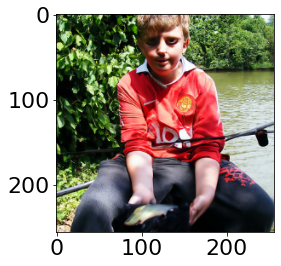

In [20]:
plt.imshow(a[2])

In [21]:
for i in range(6):
    iio.imwrite(f'adm{i}.png', a[i])

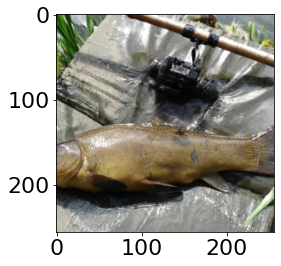

In [50]:
plt.imshow(gen[5])

In [3]:
a.shape

(419, 1172, 3)

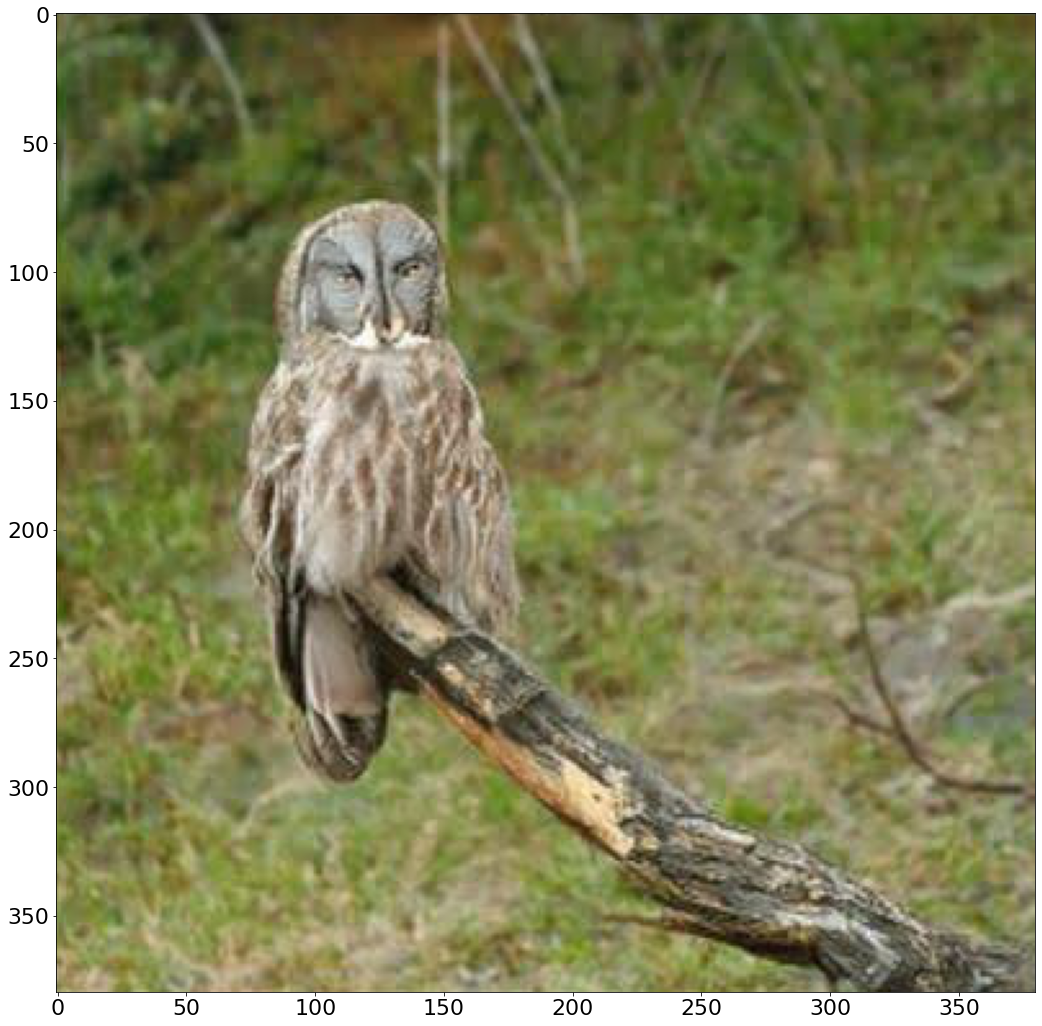

In [13]:
plt.figure(figsize=(18, 18))
plt.imshow(a[-388:-8, 396:-396])

In [15]:
a[-388:-8, 396:-396].shape

(380, 380, 3)

In [32]:
for idx in [0, 10, 20, 2, 3, 7]:
    a = iio.imread(f'palette_img/{idx}.jpg')
    a = Image.fromarray(a[-388:-8, 396:-396]).resize((256, 256))
    a.save(f'palette_result/{idx}.png')

FileNotFoundError: No such file: '/home/jiamings/Projects/ddrmpp/playground/palette_img/20.jpg'

In [25]:
a = iio.imread(f'palette_result/20.png')

In [26]:
a.shape

(304, 302, 4)

In [31]:
 Image.fromarray(a[1:-1]).resize((256,256)).save('palette_result/20.png')